In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
bike_data = pd.read_csv("SeoulBikeData.csv", encoding='latin1')

In [3]:
bike_data

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0     01/12/2017                254     0             -5.2           37   
1     01/12/2017                204     1             -5.5           38   
2     01/12/2017                173     2             -6.0           39   
3     01/12/2017                107     3             -6.2           40   
4     01/12/2017                 78     4             -6.0           36   
...          ...                ...   ...              ...          ...   
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                  2.2              2000                      -17.6   
1                  0.8              2000                      -17.6   
2                  1.0              2000                      -17.7   
3                  0.9              2000                      -17.6   
4                  2.3              2000                      -18.6   
...                ...               ...                        ...   
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
0                         0.0           0.0            0.0  Winter   
1                         0.0           0.0            0.0  Winter   
2                         0.0           0.0            0.0  Winter   
3                         0.0           0.0            0.0  Winter   
4                         0.0           0.0            0.0  Winter   
...                       ...           ...            ...     ...   
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
0     No Holiday             Yes  
1     No Holiday             Yes  
2     No Holiday             Yes  
3     No Holiday             Yes  
4     No Holiday             Yes  
...          ...             ...  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes  

[8760 rows x 14 columns]

In [4]:
#Keeping because it looks so nice
temp = bike_data[['Seasons', 'Humidity(%)', 'Rented Bike Count']]
season = temp[temp['Rented Bike Count'] > 0].groupby('Seasons').mean().reset_index()
season = season.reset_index()
season

index Seasons  Humidity(%)  Rented Bike Count
0      0  Autumn    59.044915         924.110480
1      1  Spring    58.758333         746.254167
2      2  Summer    64.981431        1034.073370
3      3  Winter    49.744907         225.541204

In [5]:
temp = bike_data[['Hour', 'Seasons', 'Rented Bike Count']]
count = temp[temp['Rented Bike Count'] > 0].groupby(['Seasons','Hour']).mean()
count = count.reset_index()
count

Seasons  Hour  Rented Bike Count
0   Autumn     0         709.437500
1   Autumn     1         552.500000
2   Autumn     2         377.475000
3   Autumn     3         256.550000
4   Autumn     4         169.025000
..     ...   ...                ...
91  Winter    19         304.033333
92  Winter    20         243.233333
93  Winter    21         240.500000
94  Winter    22         225.133333
95  Winter    23         173.433333

[96 rows x 3 columns]

In [6]:
count = count.pivot(index = 'Hour', columns = 'Seasons', values = 'Rented Bike Count')
count

Seasons       Autumn       Spring       Summer      Winter
Hour                                                      
0         709.437500   481.088889   899.065217  165.177778
1         552.500000   363.944444   698.771739  159.055556
2         377.475000   252.966667   505.750000  117.788889
3         256.550000   168.477778   342.673913   77.811111
4         169.025000   108.222222   223.815217   50.477778
5         163.412500   116.177778   245.934783   51.222222
6         359.487500   257.233333   485.836957   92.822222
7         788.876543   615.288889   902.782609  209.566667
8        1345.037037  1036.377778  1418.597826  422.200000
9         848.432099   670.388889   911.000000  254.600000
10        715.271605   570.888889   723.500000  186.400000
11        802.950617   681.466667   786.858696  228.322222
12        934.641975   836.377778   875.967391  263.633333
13       1002.666667   886.088889   890.195652  275.255556
14       1058.827160   925.666667   894.673913  284.288889
15       1156.703704   990.977778  1009.717391  298.644444
16       1293.209877  1101.455556  1174.173913  308.577778
17       1562.876543  1307.977778  1526.293478  342.511111
18       1983.333333  1689.311111  2135.141304  438.300000
19       1515.567901  1247.711111  1889.250000  304.033333
20       1321.703704  1060.511111  1801.923913  243.233333
21       1253.814815  1021.122222  1754.065217  240.500000
22       1130.209877   897.422222  1567.869565  225.133333
23        828.728395   622.955556  1153.902174  173.433333

The following data displays the average hourly Rented bike count based on the season. This is good to use incase a company needs to know how many bikes to have available at a certain time of the year.

Text(0, 0.5, 'Number of Bikes')

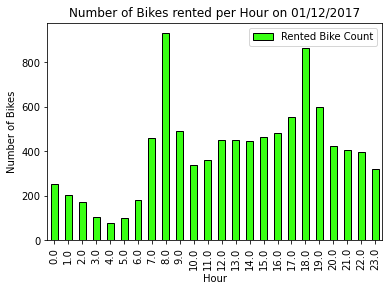

In [11]:
date = bike_data[bike_data['Date'] == '01/12/2017'].groupby('Rented Bike Count').mean().reset_index()
date = date.sort_values('Hour', ascending = True)
date.plot.bar(x = 'Hour', y = 'Rented Bike Count', color = '#39FF14', edgecolor = 'black')
plt.title("Number of Bikes rented per Hour on 01/12/2017")
plt.ylabel('Number of Bikes')

The above dataset shows the Hourly rented bike count based on a certain day of the year. This is an effective visualization for a company to know when their busiest hours in a day will be to know when to staff more members or have more available bikes. The data is clear so it should be reliable as far as the number of bikes each hour. It might also be smart to compare the bike count over a week or month at a time to see if this data trend throughout the month. The below graph backs up the previous one to show the rented bike count appears at a similar rate.

Since Car data is not given through this data set, One possible inference is comparisson of how dense traffic is throughout the year to how many bikes are rented. From this, we could make a line chart to show car traffic incline and decline with Bike traffic incline and decline.

Using the given data, one extra feature would be to look at the rented bike count, see what time of the year it is, and when the rented count spikes, check for a holiday or week that may influence less drivers on the streets. For example: In Seoul there may be a parade or a special event prohibiting drivers thus increasing bike rentals.

Text(0, 0.5, 'Number of Bikes')

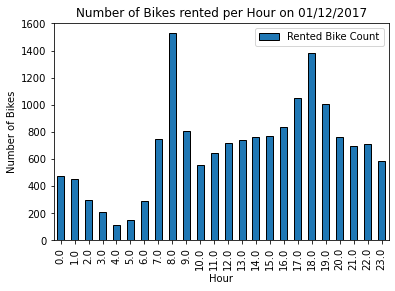

In [10]:
date = bike_data[bike_data['Date'] == '30/11/2018'].groupby('Rented Bike Count').mean().reset_index()
date = date.sort_values('Hour', ascending = True)
date.plot.bar(x = 'Hour', y = 'Rented Bike Count', edgecolor = 'black')
plt.title("Number of Bikes rented per Hour on 01/12/2017")
plt.ylabel('Number of Bikes')